In [1]:
import io
from IPython.nbformat import current
def execute_notebook(nbfile):
    with io.open(nbfile) as f:
        nb = current.read(f, 'json')
    ip = get_ipython()
    for cell in nb.worksheets[0].cells:
        if cell.cell_type != 'code':
            continue
        ip.run_cell(cell.input)
execute_notebook("/cellar/users/ramarty/Projects/hla_ii/bin/imports.ipynb")

/cellar/users/ramarty/anaconda/lib/python2.7/site-packages/IPython/nbformat/current.py:19: UserWarning: IPython.nbformat.current is deprecated.

- use IPython.nbformat for read/write/validate public API
- use IPython.nbformat.vX directly to composing notebooks of a particular version

  """)
/cellar/users/ramarty/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Populating the interactive namespace from numpy and matplotlib


In [2]:
patient_mutations = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/patient_mutations.cancer.TCGA.conservative.mut.csv',
                              index_col=0)
high_frequency_mutations = list(patient_mutations.sum()[patient_mutations.sum() >= 20].index)
print len(high_frequency_mutations)

28


##Allele space

In [3]:
allele_affinitiesI = pd.concat([pd.read_csv('/cellar/users/ramarty/Data/hla/residue/matrices/mut/class_i/oncogenes.all.max.txt',
                               index_col=0),
                               pd.read_csv('/cellar/users/ramarty/Data/hla/residue/matrices/mut/class_i/tsgenes.all.max.txt',
                               index_col=0)])
allele_affinitiesII = pd.concat([pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/allele_matrices/oncogenes.csv',
                               index_col=0),
                               pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/allele_matrices/tsgenes.csv',
                               index_col=0)])
allele_affinitiesII.index = allele_affinitiesII.mutation
allele_affinitiesII = allele_affinitiesII[allele_affinitiesII.columns[1:]]

In [4]:
allele_affinitiesI = allele_affinitiesI.ix[high_frequency_mutations].transpose()
allele_affinitiesII = allele_affinitiesII.ix[high_frequency_mutations].transpose()

In [5]:
def plot_allele_fractions(MHCI_cutoff, MHCII_cutoff):
    fractionsI, fractionsII = [], []
    for mutation in high_frequency_mutations:
        fractionsI.append(len(allele_affinitiesI[mutation][allele_affinitiesI[mutation] < MHCI_cutoff]) / float(len(allele_affinitiesI)))
        fractionsII.append(len(allele_affinitiesII[mutation][allele_affinitiesII[mutation] < MHCII_cutoff]) / float(len(allele_affinitiesII)))
    df_alleles = pd.DataFrame({'Mutation': high_frequency_mutations,
                               'MHCI': fractionsI,
                               'MHCII': fractionsII})
    fig, ax = plt.subplots(figsize=(4,4))
    plt.axhline(0.5, color='darkred', lw=2)
    plt.axvline(0.5, color='darkred', lw=2)
    ax.scatter(df_alleles.MHCI, df_alleles.MHCII, color='grey')
    for i, txt in enumerate(df_alleles.Mutation):
        ax.annotate(txt, (df_alleles.MHCI[i],df_alleles.MHCII[i]), size=8)
    plt.xlabel('Fraction of alleles with MHC-I presentation')
    plt.ylabel('Fraction of alleles with\nMHC-II presentation')
    plt.xlim(-0.05, max(df_alleles.MHCI)+0.1)
    plt.ylim(-0.05, max(df_alleles.MHCII)+0.1)
    plt.savefig('/cellar/users/ramarty/Data/hla_ii/generated_figures/class_comparison/fraction_of_alleles.MHCI_{0}.MHCII_{1}.pdf'.format(MHCI_cutoff,
                                                                                                                                 MHCII_cutoff),
                bbox_tight=True) 
    return df_alleles

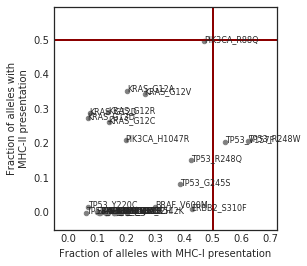

In [6]:
MHCI_cutoff, MHCII_cutoff = 2, 10
df_alleles = plot_allele_fractions(MHCI_cutoff, MHCII_cutoff)

In [8]:
df_alleles

,MHCI,MHCII,Mutation
0,0.098153,0.000890,BRAF_V600E
1,0.183653,0.000000,IDH1_R132H
2,0.116621,0.000890,PIK3CA_E545K
3,0.198700,0.209253,PIK3CA_H1047R
4,0.073871,0.288612,KRAS_G12D
5,0.264364,0.344484,KRAS_G12V
6,0.201436,0.000000,PIK3CA_E542K
7,0.159371,0.000000,NRAS_Q61R
8,0.139193,0.262100,KRAS_G12C
9,0.067031,0.273488,KRAS_G13D


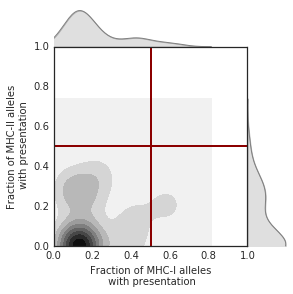

In [78]:
ax = sns.jointplot(df_alleles.MHCI, df_alleles.MHCII, color='grey', xlim=(0,1), ylim=(0,1),
             stat_func=None, kind='kde', space=0, size=4)
ax.ax_joint.axhline(0.5, color='darkred', lw=2)
ax.ax_joint.axvline(0.5, color='darkred', lw=2)
ax.ax_joint.set_xlabel('Fraction of MHC-I alleles\n with presentation')
ax.ax_joint.set_ylabel('Fraction of MHC-II alleles\n with presentation')
plt.savefig('/cellar/users/ramarty/Data/hla_ii/generated_figures/class_comparison/allele_presentation_fraction.pdf',
            bbox_inches='tight')

##Patient space

In [47]:
patient_mutations = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/patient_mutations.cancer.TCGA.conservative.mut.csv',
                              index_col=0)
high_frequency_mutations = list(patient_mutations.sum()[patient_mutations.sum() >= 20].index)
print len(high_frequency_mutations)

28


In [48]:
patient_affinitiesI = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/patient_affinities.cancer.TCGA.conservative.mut.ClassI.csv',
                               index_col=0)
patient_affinitiesII = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/patient_affinities.cancer.TCGA.conservative.mut.ClassII.csv',
                              index_col=0)

In [49]:
patient_affinitiesI_list = []
for mutations in patient_affinitiesI.columns:
        patient_affinitiesI_list.extend(list(patient_affinitiesI[mutations]))
patient_affinitiesI_series = pd.Series(patient_affinitiesI_list)

In [50]:
patient_affinitiesII_list = []
for mutations in patient_affinitiesII.columns:
        patient_affinitiesII_list.extend(list(patient_affinitiesII[mutations]))
patient_affinitiesII_series = pd.Series(patient_affinitiesII_list)

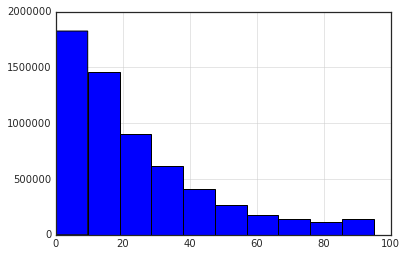

In [51]:
patient_affinitiesII_series.hist()

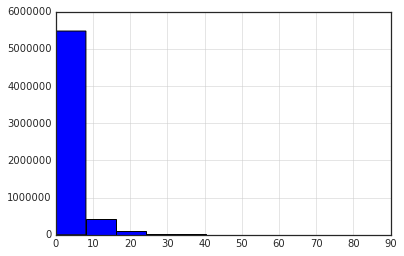

In [52]:
patient_affinitiesI_series.hist()

In [53]:
AF_df = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/generated_data/mutations/mutations_with_alleleic fraction.csv',
                    index_col=0)
AF_df_median = AF_df[AF_df.Barcode.isin(list(patient_mutations.index))].groupby('combined').median()
AF_df_median['Mutation'] = AF_df_median.index

In [54]:
patient_mutations.sum().ix['BRAF_V600E']

431

In [66]:
def plot_patient_fractions(MHCI_cutoff, MHCII_cutoff):
    fractionsI, fractionsII = [], []
    mutation_count = []
    for mutation in high_frequency_mutations:
        fractionsI.append(len(patient_affinitiesI[mutation][patient_affinitiesI[mutation] < MHCI_cutoff]) / float(len(patient_affinitiesI)))
        fractionsII.append(len(patient_affinitiesII[mutation][patient_affinitiesII[mutation] < MHCII_cutoff]) / float(len(patient_affinitiesII)))
        mutation_count.append(patient_mutations.sum().ix[mutation])
    df = pd.DataFrame({'Mutation': high_frequency_mutations,
                       'MHCI': fractionsI,
                       'MHCII': fractionsII,
                       'Mutation_count': mutation_count})
    fig, ax = plt.subplots(figsize=(4,4))
    plt.axhline(0.5, color='darkred', lw=2)
    plt.axvline(0.5, color='darkred', lw=2)
    ax.scatter(df.MHCI, df.MHCII, color='grey', alpha=0.3)
    for i, txt in enumerate(df.Mutation):
        ax.annotate(txt, (df.MHCI[i],df.MHCII[i]), size=8)
    plt.xlabel('Fraction of patients with MHC-I presentation')
    plt.ylabel('Fraction of patients with\nMHC-II presentation')
    plt.xlim(-0.05, max(df.MHCI))
    plt.ylim(-0.05, max(df.MHCII))
    plt.savefig('/cellar/users/ramarty/Data/hla_ii/generated_figures/class_comparison/fraction_of_patients.MHCI_{0}.MHCII_{1}.pdf'.format(MHCI_cutoff,
                                                                                                                                 MHCII_cutoff),
                bbox_tight=True) 
    return df

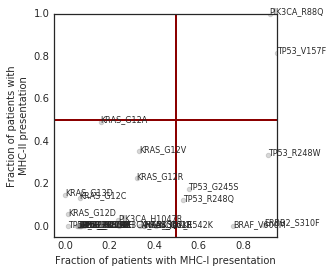

In [67]:
MHCI_cutoff, MHCII_cutoff = 2, 10
df = plot_patient_fractions(MHCI_cutoff, MHCII_cutoff)

In [57]:
df

,MHCI,MHCII,Mutation,Mutation_count
0,0.074386,0.000000,BRAF_V600E,431
1,0.084652,0.000000,IDH1_R132H,318
2,0.244026,0.000000,PIK3CA_E545K,111
3,0.238304,0.027095,PIK3CA_H1047R,90
4,0.012790,0.056715,KRAS_G12D,126
5,0.333894,0.352743,KRAS_G12V,105
6,0.407102,0.000000,PIK3CA_E542K,77
7,0.355941,0.000000,NRAS_Q61R,81
8,0.065634,0.133793,KRAS_G12C,65
9,0.002188,0.148098,KRAS_G13D,45


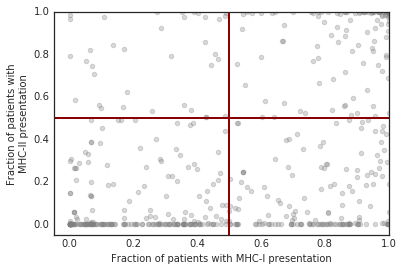

In [11]:
MHCI_cutoff, MHCII_cutoff = 2, 10
df = plot_patient_fractions(MHCI_cutoff, MHCII_cutoff)

Median presentation

In [271]:
medians = pd.merge(pd.DataFrame(patient_affinitiesI[high_frequency_mutations].median()),
                   pd.DataFrame(patient_affinitiesII[high_frequency_mutations].median()),
         left_index=True, right_index=True)
medians.columns = ['MHC-I', 'MHC-II']

In [279]:
medians['Log(PHBR-I)'] = np.log10(medians['MHC-I'])
medians['Log(PHBR-II)'] = np.log10(medians['MHC-II'])

In [288]:
medians['Log(PHBR-II)']

BRAF_V600E       1.571493
IDH1_R132H       1.528727
PIK3CA_E545K     1.417793
PIK3CA_H1047R    1.152087
KRAS_G12D        1.197181
KRAS_G12V        1.070626
PIK3CA_E542K     1.582708
NRAS_Q61R        1.534864
KRAS_G12C        1.171818
KRAS_G13D        1.135569
NRAS_Q61K        1.576294
PIK3CA_R88Q     -0.084126
IDH1_R132C       1.561736
KRAS_G12A        1.018655
BRAF_V600M       1.416667
ERBB2_S310F      1.495689
KRAS_G12R        1.097525
HRAS_Q61R        1.534864
TP53_R175H       1.635733
TP53_R273C       1.707912
TP53_R248Q       1.148441
TP53_R273H       1.708920
TP53_R248W       1.057971
TP53_R282W       1.851202
TP53_Y220C       1.420986
TP53_G245S       1.216593
TP53_H179R       1.835854
TP53_V157F       0.704437
Name: Log(PHBR-II), dtype: float64

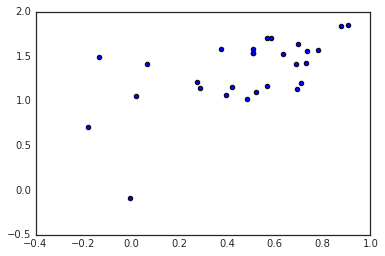

In [290]:
fig, ax = plt.subplots()
ax.scatter(medians['Log(PHBR-I)'], medians['Log(PHBR-II)'])

In [269]:
medians.head()

,MHC-I,MHC-II
EGFR_ifd_55174772,6.377198,50.310831
NOTCH1_ifd_136518618,5.999152,56.237585
PIK3R1_ifd_68295304,0.933506,9.191870
CTNNB1_ifd_41224643,2.054611,38.559832
PIK3R1_ifd_68293795,6.736735,51.096455


In [255]:
df

,MHCI,MHCII,Mutation,Mutation_count,allelic_fraction
0,0.074386,0.000000,BRAF_V600E,431,0.368421
1,0.084652,0.000000,IDH1_R132H,318,0.364596
2,0.244026,0.000000,PIK3CA_E545K,111,0.261905
3,0.238304,0.027095,PIK3CA_H1047R,90,0.322282
4,0.012790,0.056715,KRAS_G12D,126,0.281492
5,0.333894,0.352743,KRAS_G12V,105,0.301508
6,0.407102,0.000000,PIK3CA_E542K,77,0.307692
7,0.355941,0.000000,NRAS_Q61R,81,0.442504
8,0.065634,0.133793,KRAS_G12C,65,0.375000
9,0.002188,0.148098,KRAS_G13D,45,0.400000


Look at allelic fraction

In [228]:
df = pd.merge(df, AF_df_median, on='Mutation', how='inner')

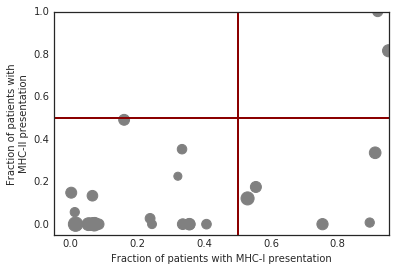

In [229]:
fig, ax = plt.subplots()
plt.axhline(0.5, color='darkred', lw=2)
plt.axvline(0.5, color='darkred', lw=2)
ax.scatter(df.MHCI, df.MHCII, color='grey', s=df.allelic_fraction*300)
#for i, txt in enumerate(df.Mutation):
#    ax.annotate(txt, (df.MHCI[i],df.MHCII[i]), size=8)
plt.xlabel('Fraction of patients with MHC-I presentation')
plt.ylabel('Fraction of patients with\nMHC-II presentation')
plt.xlim(-0.05, max(df.MHCI))
plt.ylim(-0.05, max(df.MHCII))
plt.savefig('/cellar/users/ramarty/Data/hla_ii/generated_figures/overview/fraction_of_patients.MHCI_{0}.MHCII_{1}.allelic_fraction.pdf'.format(MHCI_cutoff,
                                                                                                                                 MHCII_cutoff),
                bbox_tight=True) 

In [230]:
sp.spearmanr(df.MHCII, df.allelic_fraction)

SpearmanrResult(correlation=-0.23733318373093043, pvalue=0.22396204997436922)

In [231]:
ras_mutations = [x for x in df.Mutation if 'RAS' in x]

In [232]:
df[df.Mutation.isin(ras_mutations)]

,MHCI,MHCII,Mutation,Mutation_count,allelic_fraction
4,0.012790,0.056715,KRAS_G12D,126,0.281492
5,0.333894,0.352743,KRAS_G12V,105,0.301508
7,0.355941,0.000000,NRAS_Q61R,81,0.442504
8,0.065634,0.133793,KRAS_G12C,65,0.375000
9,0.002188,0.148098,KRAS_G13D,45,0.400000
10,0.336082,0.000000,NRAS_Q61K,48,0.382891
13,0.160552,0.490912,KRAS_G12A,28,0.394444
16,0.321441,0.225513,KRAS_G12R,27,0.216336
17,0.355941,0.000000,HRAS_Q61R,23,0.398058


##Patient Coverage

In [13]:
clinical = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/generated_data/mhc_diversity/dataframe.csv', index_col=0)

In [14]:
clinical.head()

,classI,classII,Tissue,Age,Race,homozygous_classI,homozygous_classII,homozygous_total,passenger_coverageI,passenger_coverageII,classI_cat,classII_cat,classI_het,classII_het
TCGA-DH-A7UV,0.494106,0.306483,LGG,49.0,WHITE,1.0,3.0,4.0,0.536184,0.341009,other,other,other,homo
TCGA-DH-A7UT,0.554028,0.320236,LGG,30.0,WHITE,1.0,1.0,2.0,0.530702,0.384868,high,other,other,het
TCGA-DH-A7UR,0.501965,0.310413,LGG,59.0,WHITE,0.0,0.0,0.0,0.514254,0.360746,other,other,het,het
TCGA-DH-A7US,0.441061,0.332024,LGG,50.0,WHITE,0.0,2.0,2.0,0.527412,0.382675,low,high,het,het
TCGA-DD-A4NB,0.482318,0.321218,LIHC,25.0,WHITE,0.0,0.0,0.0,0.493421,0.378289,low,other,het,het


In [15]:
clinical = clinical.dropna()

0.446168958742 0.293713163065


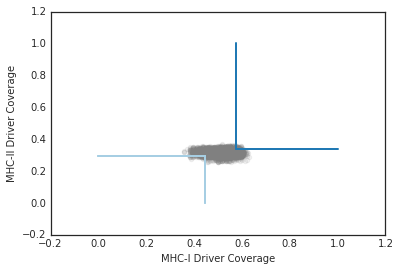

In [17]:
low, high = 0.1, 0.9
plt.scatter(clinical.classI, clinical.classII, color='grey', alpha=0.1)
#plt.xlim(0.1, 0.23)
#plt.ylim(0.04, 0.10)
print clinical.classI.quantile(low), clinical.classII.quantile(low)
plt.plot([0, clinical.classI.quantile(low)], [clinical.classII.quantile(low), clinical.classII.quantile(low)], 
         color=sns.color_palette("Paired")[0], lw=2) # low
plt.plot([clinical.classI.quantile(low), clinical.classI.quantile(low)], [0, clinical.classII.quantile(low)], 
         color=sns.color_palette("Paired")[0], lw=2) # low
plt.plot([0, clinical.classI.quantile(low)], [clinical.classII.quantile(low), clinical.classII.quantile(low)], 
         color=sns.color_palette("Paired")[0], lw=2) # high-low
plt.plot([clinical.classI.quantile(low), clinical.classI.quantile(low)], [0, clinical.classII.quantile(low)], 
         color=sns.color_palette("Paired")[0], lw=2) # high-low

plt.plot([clinical.classI.quantile(high), 1], [clinical.classII.quantile(high), clinical.classII.quantile(high)],
         color=sns.color_palette("Paired")[1], lw=2) # high
plt.plot([clinical.classI.quantile(high), clinical.classI.quantile(high)], [clinical.classII.quantile(high), 1], 
         color=sns.color_palette("Paired")[1], lw=2) # high
plt.xlabel('MHC-I Driver Coverage')
plt.ylabel('MHC-II Driver Coverage')

In [18]:
low_low_patients = list(clinical[(clinical.classI < clinical.classI.quantile(low))&(clinical.classII < clinical.classII.quantile(low))].index)
high_high_patients = list(clinical[(clinical.classI > clinical.classI.quantile(high))&(clinical.classII > clinical.classII.quantile(high))].index)
low_high_patients = list(clinical[(clinical.classI < clinical.classI.quantile(low))&(clinical.classII > clinical.classII.quantile(high))].index)
high_low_patients = list(clinical[(clinical.classI > clinical.classI.quantile(high))&(clinical.classII < clinical.classII.quantile(low))].index)
print len(low_low_patients), len(high_high_patients), len(low_high_patients), len(high_low_patients)

36 34 61 43


In [19]:
low_patients = list(clinical[(clinical.classI < clinical.classI.quantile(low))].index)
high_patients = list(clinical[(clinical.classI > clinical.classI.quantile(high))].index)

In [20]:
sp.mannwhitneyu(clinical.loc[low_patients].Age,
                clinical.loc[high_patients].Age)

MannwhitneyuResult(statistic=91939.0, pvalue=0.0046883885930053401)

In [21]:
print clinical.loc[low_low_patients].Age.mean()
print clinical.loc[low_low_patients].Age.median()

53.4166666667
54.0


In [22]:
print clinical.loc[high_high_patients].Age.mean()
print clinical.loc[high_high_patients].Age.median()

61.1764705882
66.5


In [23]:
age_df = pd.DataFrame({'Category': ['Low\nMHC-I & MHC-II\nCoverage' for x in clinical.loc[low_low_patients].Age] \
                       + ['High\nMHC-I & MHC-II\nCoverage' for x in clinical.loc[high_high_patients].Age] \
                       + ['Low MHC-I &\nHigh MHC-II\nCoverage' for x in clinical.loc[low_high_patients].Age] \
                       + ['High MHC-I &\nLow MHC-II\nCoverage' for x in clinical.loc[high_low_patients].Age],
                       'Age': list(clinical.loc[low_low_patients].Age) + list(clinical.loc[high_high_patients].Age) \
                          + list(clinical.loc[low_high_patients].Age) + list(clinical.loc[high_low_patients].Age)})

In [24]:
statistic, p = sp.mannwhitneyu(age_df[age_df.Category == 'Low\nMHC-I & MHC-II\nCoverage'].Age,
             age_df[age_df.Category == 'High\nMHC-I & MHC-II\nCoverage'].Age)

In [25]:
statistic, p = sp.mannwhitneyu(age_df[age_df.Category == 'Low\nMHC-I & MHC-II\nCoverage'].Age,
             age_df[age_df.Category == 'High\nMHC-I & MHC-II\nCoverage'].Age)

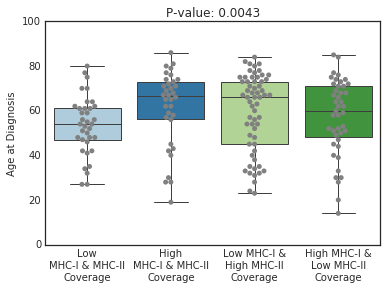

In [26]:
ax = sns.boxplot(x='Category', y='Age', data=age_df, palette=sns.color_palette("Paired"), whis=np.inf)
ax = sns.swarmplot(x='Category', y='Age', data=age_df, color='grey')
plt.xlabel('')
plt.ylabel('Age at Diagnosis')
plt.title('P-value: {0}'.format(round(p, 4)))

In [189]:
clinical.loc[low_low_patients].Tissue.value_counts()

THCA    7
BLCA    6
LGG     5
HNSC    3
KICH    3
PAAD    3
LUAD    3
LIHC    3
READ    2
BRCA    2
STAD    2
UCEC    2
KIRP    2
LUSC    1
SKCM    1
PRAD    1
COAD    1
KIRC    1
OV      1
Name: Tissue, dtype: int64

In [190]:
clinical.loc[high_high_patients].Tissue.value_counts()

LUAD    8
HNSC    7
LIHC    6
KIRC    6
THCA    4
GBM     4
STAD    4
PRAD    3
KIRP    3
COAD    3
BLCA    3
LUSC    3
PAAD    3
LGG     2
READ    2
SKCM    1
BRCA    1
CESC    1
OV      1
Name: Tissue, dtype: int64

In [194]:
for cell in clinical.columns[14:]:
    print cell, sp.mannwhitneyu(clinical.loc[low_low_patients][cell],
                    clinical.loc[high_high_patients][cell])

B cells naive MannwhitneyuResult(statistic=1462.5, pvalue=0.22890257066490843)
B cells memory MannwhitneyuResult(statistic=1559.0, pvalue=0.40579361837353839)
Plasma cells MannwhitneyuResult(statistic=1270.5, pvalue=0.025795512216046021)
T cells CD8 MannwhitneyuResult(statistic=1425.5, pvalue=0.16885143191679108)
T cells CD4 naive MannwhitneyuResult(statistic=1560.5, pvalue=0.34195040891799589)
T cells CD4 memory resting MannwhitneyuResult(statistic=1396.0, pvalue=0.1309585726632207)
T cells CD4 memory activated MannwhitneyuResult(statistic=1425.0, pvalue=0.1272553112712192)
T cells follicular helper MannwhitneyuResult(statistic=1207.0, pvalue=0.0075706660958651294)
T cells regulatory (Tregs) MannwhitneyuResult(statistic=1336.5, pvalue=0.058980286112663732)
T cells gamma delta MannwhitneyuResult(statistic=1578.5, pvalue=0.404234522738532)
NK cells resting MannwhitneyuResult(statistic=1583.5, pvalue=0.48001579029087399)
NK cells activated MannwhitneyuResult(statistic=1499.0, pvalue=0.29

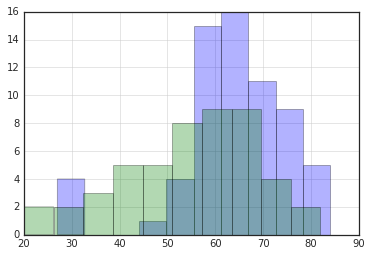

In [70]:
clinical.loc[high_high_patients].Age.hist(alpha=0.3)
clinical.loc[low_low_patients].Age.hist(alpha=0.3)

##Focusing on specific mutations

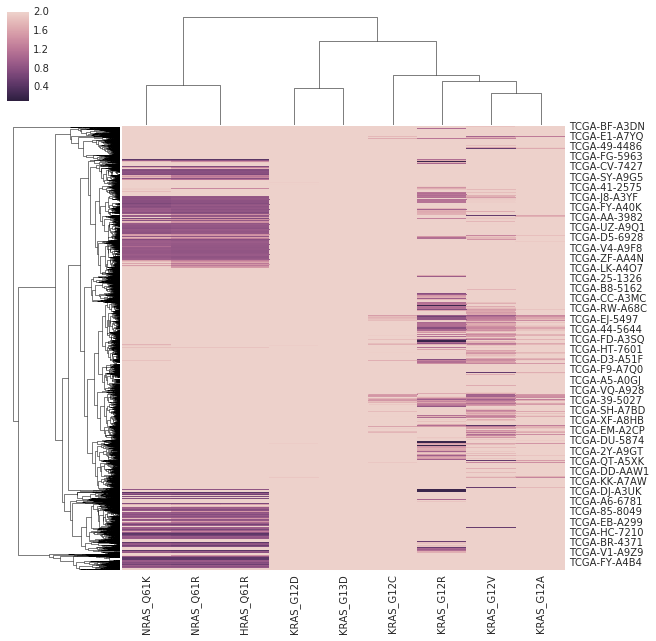

In [233]:
sns.clustermap(patient_affinitiesI[ras_mutations],
              vmax=2, cmap=sns.cubehelix_palette(reverse=True, as_cmap=True))

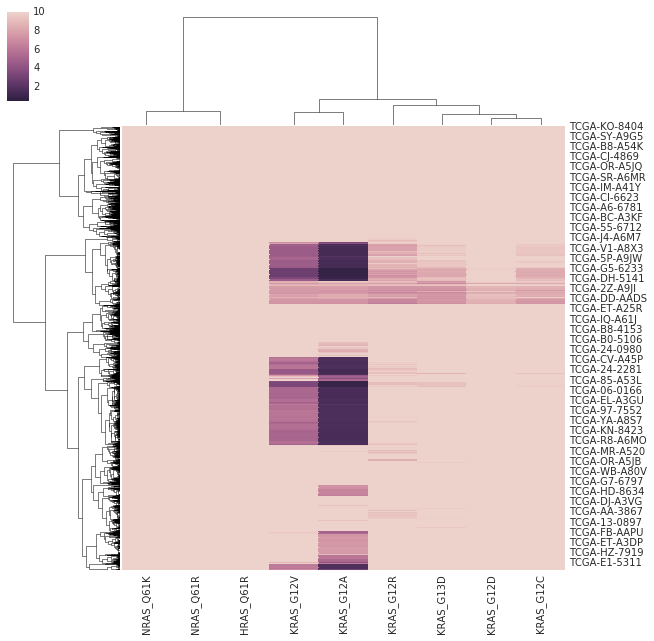

In [235]:
sns.clustermap(patient_affinitiesII[ras_mutations],
              vmax=10, cmap=sns.cubehelix_palette(reverse=True, as_cmap=True))

In [169]:
patient_mutations[ras][patient_mutations[ras] == 1].index

Index([u'TCGA-BJ-A0Z2', u'TCGA-BJ-A2P4', u'TCGA-BJ-A45D', u'TCGA-DJ-A13M',
       u'TCGA-DJ-A2QB', u'TCGA-EL-A3CZ', u'TCGA-EL-A3ZR', u'TCGA-EL-A4JV',
       u'TCGA-ET-A2N5', u'TCGA-ET-A40P', u'TCGA-HI-7168', u'TCGA-P8-A5KD',
       u'TCGA-QR-A6GW', u'TCGA-QR-A6H4', u'TCGA-QR-A70M', u'TCGA-SP-A6QJ',
       u'TCGA-SR-A6MY', u'TCGA-VN-A88N', u'TCGA-W2-A7HC', u'TCGA-W2-A7HD',
       u'TCGA-WB-A80O', u'TCGA-WB-A81R', u'TCGA-WB-A81T'],
      dtype='object')

In [245]:
threshold = 2
for ras in ras_mutations:
    # fraction of patients under 10 PHBR with mutation v fraction of patients over 10 with mutation
    print ras, patient_mutations.loc[patient_affinitiesII[ras][patient_affinitiesII[ras] < threshold].index][ras].mean(), \
    patient_mutations.loc[patient_affinitiesII[ras][patient_affinitiesII[ras] > threshold].index][ras].mean()

KRAS_G12D nan 0.0212049814877
KRAS_G12V 0.0 0.0176737922909
NRAS_Q61R nan 0.0136317738135
KRAS_G12C nan 0.0109390777516
KRAS_G13D nan 0.00757320767418
NRAS_Q61K nan 0.0080780881858
KRAS_G12A 0.00364077669903 0.00512342803912
KRAS_G12R nan 0.00454392460451
HRAS_Q61R nan 0.00387075058903


In [248]:
threshold = 1
for ras in ras_mutations:
    # fraction of patients under 10 PHBR with mutation v fraction of patients over 10 with mutation
    print ras, patient_mutations.loc[patient_affinitiesI[ras][patient_affinitiesI[ras] < threshold].index][ras].mean(), \
    patient_mutations.loc[patient_affinitiesI[ras][patient_affinitiesI[ras] > threshold].index][ras].mean()

KRAS_G12D nan 0.0212049814877
KRAS_G12V 0.010101010101 0.0177990758172
NRAS_Q61R 0.0155541153597 0.0129574903387
KRAS_G12C nan 0.0109390777516
KRAS_G13D nan 0.00757320767418
NRAS_Q61K 0.00919238345371 0.00769404842725
KRAS_G12A 0.0 0.00471698113208
KRAS_G12R 0.00247524752475 0.00469483568075
HRAS_Q61R 0.00324044069994 0.00409183905433


In [237]:
patient_affinitiesII[ras][patient_affinitiesII[ras] < 10].index

Index([u'TCGA-05-4417', u'TCGA-05-4424', u'TCGA-05-4430', u'TCGA-06-0878',
       u'TCGA-06-5411', u'TCGA-13-1492', u'TCGA-13-1512', u'TCGA-14-1043',
       u'TCGA-16-1460', u'TCGA-25-2399',
       ...
       u'TCGA-XJ-A9DI', u'TCGA-XK-AAK1', u'TCGA-Y8-A896', u'TCGA-Y8-A8RY',
       u'TCGA-Y8-A8S1', u'TCGA-YL-A8SL', u'TCGA-YL-A8SP', u'TCGA-Z2-AA3S',
       u'TCGA-ZF-AA4W', u'TCGA-ZM-AA0H'],
      dtype='object', length=337)

In [175]:
for ras in ras_mutations:
    print ras, patient_affinitiesII.loc[patient_mutations[ras][patient_mutations[ras] == 1].index][ras].median(), \
    patient_affinitiesII.loc[patient_mutations[ras][patient_mutations[ras] == 0].index][ras].median(), 

KRAS_G12D 15.8407568802 15.7454530092
KRAS_G12V 11.8837161144 11.7659310088
NRAS_Q61R 35.6949840781 34.2498417804
KRAS_G12C 14.2743248945 14.8531240444
KRAS_G13D 12.7597145466 13.6716727084
NRAS_Q61K 37.7186794651 37.6958838549
KRAS_G12A 14.9137304224 10.3833742485
KRAS_G12R 12.5779364712 12.5136267377
HRAS_Q61R 37.4315182383 34.2631608775


In [174]:
for ras in ras_mutations:
    print ras, patient_affinitiesI.loc[patient_mutations[ras][patient_mutations[ras] == 1].index][ras].median(),  
    patient_affinitiesI.loc[patient_mutations[ras][patient_mutations[ras] == 0].index][ras].median()

KRAS_G12D 5.04955521662 5.14476953982
KRAS_G12V 2.38931498675 2.50331466804
NRAS_Q61R 3.16858496953 3.22650733297
KRAS_G12C 3.78286536347 3.6798652064
KRAS_G13D 4.46093931886 4.95627297708
NRAS_Q61K 2.76330232966 3.24625068395
KRAS_G12A 2.69304800599 3.05506601628
KRAS_G12R 3.83172833249 3.33848531685
HRAS_Q61R 3.4657600351 3.22388059701


In [257]:
patient_mutations_high_AF = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/patient_mutations.high_allelic_fraction.TCGA.conservative.mut.csv',
                                        index_col=0)

In [258]:
patient_mutations[high_frequency_mutations].to_csv('/cellar/users/ramarty/Data/hla_ii/generated_data/mutations/patient_mutations.high_AF.csv')

In [254]:
patient_affinitiesI[high_frequency_mutations].to_csv('/cellar/users/ramarty/Data/hla_ii/generated_data/mutations/patient_affinitiesI.HF.csv')
patient_affinitiesII[high_frequency_mutations].to_csv('/cellar/users/ramarty/Data/hla_ii/generated_data/mutations/patient_affinitiesII.HF.csv')
patient_mutations[high_frequency_mutations].to_csv('/cellar/users/ramarty/Data/hla_ii/generated_data/mutations/patient_mutations.HF.csv')